# Movies Reviews Sentiment Analysis
### Data

In [1]:
%load_ext autoreload
%autoreload 2
# Cargamos el dataset
from util import load_datasets_unlabeled_test
train, dev, test = load_datasets_unlabeled_test(test_size_val=0.2) # en realidad dev_size_val
X_train, y_train = train
X_dev, y_dev = dev
X_test=test  # No tenemos el correspondiente y_test

## CountVectorizer Approach

In [2]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from util import eval
from util import iterate_pipeline_params    
import pandas as pd

### LogisticRegression

In [4]:
param_grid = {
    'vect__binary': [True],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__min_df': [1, 3, 5, 7],
    'vect__max_df': [0.95, 0.9, 0.7],
    'clf__random_state': [0],
    'clf__C': [0.1,1,10],
}
params_list = list(ParameterGrid(param_grid))

In [5]:
from sklearn.linear_model import LogisticRegression
#
vect = CountVectorizer()
clf=LogisticRegression()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
#
results=iterate_pipeline_params(pipeline,params_list,X_train,y_train,X_dev, y_dev)

In [6]:
# results to Pandas
results_df = pd.DataFrame(results)
results_df.sort_values(['acc', 'f1'], ascending=False)[:5]

acc  clf__C  clf__random_state        f1  vect__binary  vect__max_df  \
40  0.859813     1.0                  0  0.858316          True          0.95   
52  0.859813     1.0                  0  0.858316          True          0.90   
43  0.859813     1.0                  0  0.858027          True          0.95   
7   0.859813     0.1                  0  0.857713          True          0.95   
19  0.859813     0.1                  0  0.857713          True          0.90   

    vect__min_df vect__ngram_range  
40             3            (1, 2)  
52             3            (1, 2)  
43             5            (1, 2)  
7              5            (1, 2)  
19             5            (1, 2)

Train using <class 'sklearn.linear_model.logistic.LogisticRegression'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





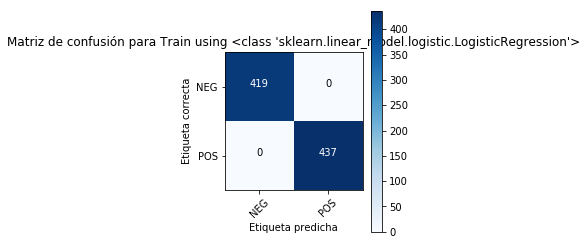

Dev using <class 'sklearn.linear_model.logistic.LogisticRegression'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.86      0.89      0.87       116
          1       0.86      0.83      0.84        98

avg / total       0.86      0.86      0.86       214





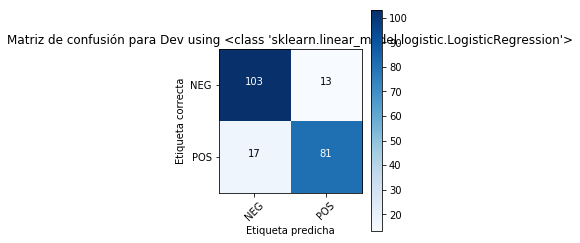

In [8]:
from util import save_model
from util import print_plot_classification_report
idx=40
vect = CountVectorizer()
clf = LogisticRegression()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
params_=dict(results_df.iloc[idx].drop(['acc','f1']))
pipeline.set_params(**params_)
pipeline.fit(X_train,y_train)
save_model(pipeline,'pipe_cv_logreg_iteparams_first')
#
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

### MultinomialNB

In [10]:
param_grid = {
    'vect__binary': [True],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__min_df': [1, 3, 5, 7],
    'vect__max_df': [0.95, 0.9, 0.7],
    'clf__alpha': (1, 0.1, 0.01),
}
params_list = list(ParameterGrid(param_grid))

In [11]:
from sklearn.naive_bayes import MultinomialNB
#
vect = CountVectorizer()
clf=MultinomialNB()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
#
results=iterate_pipeline_params(pipeline,params_list,X_train,y_train,X_dev, y_dev)

In [12]:
# results to Pandas
results_df = pd.DataFrame(results)
results_df.sort_values(['acc', 'f1'], ascending=False)[:5]

acc  clf__alpha        f1  vect__binary  vect__max_df  vect__min_df  \
30  0.845794        1.00  0.844569          True          0.70             5   
10  0.845794        1.00  0.844295          True          0.95             7   
22  0.845794        1.00  0.844295          True          0.90             7   
34  0.841121        1.00  0.839722          True          0.70             7   
93  0.841121        0.01  0.839722          True          0.90             7   

   vect__ngram_range  
30            (1, 1)  
10            (1, 2)  
22            (1, 2)  
34            (1, 2)  
93            (1, 1)

Train using <class 'sklearn.naive_bayes.MultinomialNB'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       419
          1       0.98      0.91      0.95       437

avg / total       0.95      0.95      0.95       856





Dev using <class 'sklearn.naive_bayes.MultinomialNB'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.85      0.86      0.86       116
          1       0.84      0.83      0.83        98

avg / total       0.85      0.85      0.85       214





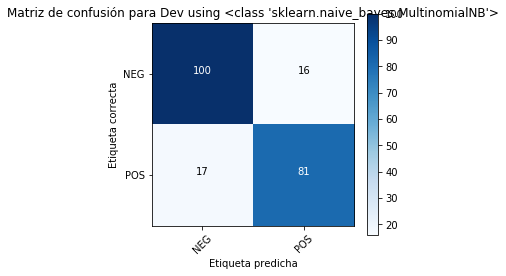

In [13]:
idx=30
vect = CountVectorizer()
clf = MultinomialNB()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
params_=dict(results_df.iloc[idx].drop(['acc','f1']))
pipeline.set_params(**params_)
pipeline.fit(X_train,y_train)
save_model(pipeline,'pipe_cv_multinomial_iteparams_first')
#
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])

**Estos resultados en primera instancia estarian descartando la opcion de MultinomialNB**

### LinearSVC

In [14]:
param_grid = {
    'vect__binary': [True],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)],
    'vect__min_df': [1, 3, 5, 7],
    'vect__max_df': [0.95, 0.9, 0.7],
    'clf__random_state': [0],
    'clf__C': [0.1,1,10],
}
params_list = list(ParameterGrid(param_grid))

In [15]:
from sklearn.svm import LinearSVC
#
#
vect = CountVectorizer()
clf=LinearSVC()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
#
results=iterate_pipeline_params(pipeline,params_list,X_train,y_train,X_dev, y_dev)

In [16]:
# results to Pandas
results_df = pd.DataFrame(results)
results_df.sort_values(['acc', 'f1'], ascending=False)[:5]

acc  clf__C  clf__random_state        f1  vect__binary  \
42   0.855140     0.1                  0  0.853447          True   
102  0.855140     1.0                  0  0.853447          True   
162  0.855140    10.0                  0  0.853447          True   
101  0.850467     1.0                  0  0.848870          True   
161  0.850467    10.0                  0  0.848870          True   

     vect__max_df  vect__min_df vect__ngram_range  
42            0.7             1            (1, 3)  
102           0.7             1            (1, 3)  
162           0.7             1            (1, 3)  
101           0.7             1            (1, 2)  
161           0.7             1            (1, 2)

Observamos que LinearSVC mejora a partir de la busqueda parametrica, sobretodo en la parte de countVectorizer (notemos que C el parametro de regularizacion, no altera el resultado principal).

Train using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       419
          1       1.00      1.00      1.00       437

avg / total       1.00      1.00      1.00       856





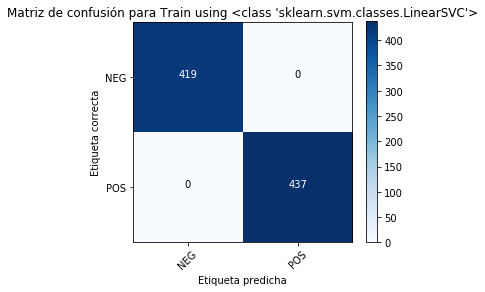

Dev using <class 'sklearn.svm.classes.LinearSVC'>
Reporte de clasificación: 

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       116
          1       0.86      0.82      0.84        98

avg / total       0.86      0.86      0.85       214





In [17]:
# Elijo el que me daria valores por default para C
idx=102
vect = CountVectorizer()
clf = LinearSVC()

pipeline = Pipeline([
    ('vect', vect),
    ('clf', clf),
])
params_=dict(results_df.iloc[idx].drop(['acc','f1']))
pipeline.set_params(**params_)
pipeline.fit(X_train,y_train)
save_model(pipeline,'pipe_cv_linearsvc_iteparams_first')
#
est=str(pipeline.steps[-1][1].__class__)
# Train
print_plot_classification_report(pipeline,X_train,y_train,'Train using ' + est,plotFlag=True,classes_list=['NEG','POS'])
# Dev
print_plot_classification_report(pipeline,X_dev,y_dev,'Dev using ' + est,plotFlag=True,classes_list=['NEG','POS'])